In [1]:
import pandas as pd
import seaborn as sb

employees = pd.read_csv("employees.csv", header=0)
employees_nophone = employees.drop(["phone1", "phone2"], axis=1)
departments = pd.read_csv("departments.csv")

# # Tarkastellaan datan perusarvoja
# employees.describe()
# employees_nophone.describe()
# employees.info()
# employees.isnull()
# employees.isnull().sum()
# # employees.unique()



In [2]:
def task_1_salary(employee_data):
    # Naytettavat sarakkeet
    columns = ["fname", "lname", "salary", "dep"]
    # Tarkistellaan 3 korkeimman seka matalimman palkan saajaa
    highest_salary = employee_data[columns].nlargest(3, "salary")
    smallest_salary = employee_data[columns].nsmallest(3, "salary")
    print(f"3 korkeimman palkansaajaa: \n{'-' * 50}\n{highest_salary}\n\n"
          f"3 matalliman palkansaajaa: \n{'-' * 50}\n{smallest_salary}")


task_1_salary(employees)

3 korkeimman palkansaajaa: 
--------------------------------------------------
   fname    lname  salary  dep
0    Iso     Pomo   10000    1
7  Jaana  Jämäkkä    3250    4
9   Peke     Pomo    3250    5

3 matalliman palkansaajaa: 
--------------------------------------------------
    fname        lname  salary  dep
10  Taavi      Tanakka    2000    5
11  Maija       Mainio    2200    5
12  Mikko  Meikäläinen    2250    5


In [3]:
def task_1_merge_dataframes(employee_data, department_data):
    # Yhdistetaan dataframen employee_data ja department_data
    # yhdistamalla ne sarakkeen dep perusteella
    employee_data = employee_data.drop("image", axis=1)
    new_data = pd.merge(employee_data, department_data, how="inner", on="dep")
    return new_data


merged_data = task_1_merge_dataframes(employees, departments)
merged_data

,id,fname,lname,salary,bdate,email,dep,phone1,phone2,gender,dname
0,1,Iso,Pomo,10000,1960-01-01,iso.pomo@firma.fi,1,12545054,65665661.0,0,Johtoporras
1,2,Make,Myyjä,2500,1966-06-16,make.myyja@gmail.com,2,34534524,65465464.0,0,Myynti
2,3,Maiju,Myyjä,2500,1970-04-15,maiju.myyja@hotmail.com,2,32232353,56546243.0,1,Myynti
3,4,Mike,Markkinoija,3000,1980-06-19,mike.markkinoija@firma.fi,3,76565574,65435334.0,0,Markkinointi
4,5,Masa,Markkina,3000,1977-04-13,masa.markkina@gmail.com,3,52545054,NaN,0,Markkinointi
5,6,Tiina,Tuote,2500,1965-05-25,tiina.tuote@hotmail.com,4,46545054,NaN,1,Tuotekehitys
6,7,Taisto,Tähdellinen,2800,1955-11-11,taisto.tahdellinen@firma.fi,4,57545054,NaN,0,Tuotekehitys
7,8,Jaana,Jämäkkä,3250,1979-06-01,jaana.jamakka@gmail.com,4,43545054,NaN,1,Tuotekehitys
8,9,Ismo,Insinööri,2600,1957-06-05,ismo.insinoori@firma.fi,4,34534054,NaN,0,Tuotekehitys
9,10,Peke,Pomo,3250,1990-10-01,peke.pomo@hotmail.com,5,65545054,NaN,0,Tuotanto


In [4]:

def change_to_int(df, variable_list):
    # Funktio, jonka avulla muutetaan listassa olevien sarakkeiden arvot liukuluvusista kokonaisluvuiksi
    for variable in variable_list:
        df[variable] = df[variable].astype(int)
    return df


def task_2_count_employees(df):
    # Lasketaan joukko arvoja ja tallennetaan ne muuttujiin
    male = (df["gender"] == 0).sum()
    female = (df["gender"] == 1).sum()
    total = male + female
    male_percentage = round(male / total * 100, 1)
    female_percentage = round(female / total * 100, 1)
    max_salary = df["salary"].max()
    min_salary = df["salary"].min()
    mean_salary = round(df["salary"].mean(), 1)
    no_phone = df['phone2'].isnull().sum()
    # ----------
    dep_4_total_salary = sum(df[df['dep'] == 4]['salary'])
    dep_4_employees = sum(df[df['dep'] == 4]['salary'].value_counts() == 1)
    dep_4_mean = dep_4_total_salary / dep_4_employees

    # Tehdään dict muuttujista
    data_dict = {
        "total": total,
        "male": male,
        "female": female,
        "male%": male_percentage,
        "female%": female_percentage,
        "max_salary": max_salary,
        "min_salary": min_salary,
        "mean_salary": mean_salary,
        "dep_4_mean_salary": dep_4_mean,
        "no_phone2": no_phone
    }
    # Luodaan uusi dataframe dictin avulla
    new_dataframe = pd.DataFrame.from_dict(data_dict, orient="index", columns=["value"]).transpose()
    # Luodaan lista sarakkeista, joiden arvot halutaan muuttaa kokonaisluvuiksi
    variable_list = ["total", "male","female","no_phone2"]

    # Ajetaan data tyypin muuttajafunktio
    modified_data_types = change_to_int(new_dataframe,variable_list)

    return modified_data_types


# Luodaan uusi dataframe funktion sisällä luodusta dict:ista
task_2_count_employees(merged_data)


,total,male,female,male%,female%,max_salary,min_salary,mean_salary,dep_4_mean_salary,no_phone2
value,15,10,5,66.7,33.3,10000.0,2000.0,3123.3,2787.5,10


In [5]:
def calculate_age(df):
    # Lasketaan ika ja tallennetaan se uuteen sarakkeeseen
    age = pd.Timestamp.now().normalize() - pd.to_datetime(df["bdate"])
    df["age"] = (age.dt.days / 365).astype(int)
    return df

df_w_age = calculate_age(merged_data)
df_w_age

,id,fname,lname,salary,bdate,email,dep,phone1,phone2,gender,dname,age
0,1,Iso,Pomo,10000,1960-01-01,iso.pomo@firma.fi,1,12545054,65665661.0,0,Johtoporras,62
1,2,Make,Myyjä,2500,1966-06-16,make.myyja@gmail.com,2,34534524,65465464.0,0,Myynti,56
2,3,Maiju,Myyjä,2500,1970-04-15,maiju.myyja@hotmail.com,2,32232353,56546243.0,1,Myynti,52
3,4,Mike,Markkinoija,3000,1980-06-19,mike.markkinoija@firma.fi,3,76565574,65435334.0,0,Markkinointi,42
4,5,Masa,Markkina,3000,1977-04-13,masa.markkina@gmail.com,3,52545054,NaN,0,Markkinointi,45
5,6,Tiina,Tuote,2500,1965-05-25,tiina.tuote@hotmail.com,4,46545054,NaN,1,Tuotekehitys,57
6,7,Taisto,Tähdellinen,2800,1955-11-11,taisto.tahdellinen@firma.fi,4,57545054,NaN,0,Tuotekehitys,66
7,8,Jaana,Jämäkkä,3250,1979-06-01,jaana.jamakka@gmail.com,4,43545054,NaN,1,Tuotekehitys,43
8,9,Ismo,Insinööri,2600,1957-06-05,ismo.insinoori@firma.fi,4,34534054,NaN,0,Tuotekehitys,65
9,10,Peke,Pomo,3250,1990-10-01,peke.pomo@hotmail.com,5,65545054,NaN,0,Tuotanto,31


In [6]:
def add_age_group(df):
    # Lisataan ikaluokka uuteen sarakkeeseen
    df["age_group"] = pd.cut(
        df["age"],
        bins=[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
        labels=["20", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70"])
    return df

df_w_age_group = add_age_group(df_w_age)
df_w_age_group

,id,fname,lname,salary,bdate,email,dep,phone1,phone2,gender,dname,age,age_group
0,1,Iso,Pomo,10000,1960-01-01,iso.pomo@firma.fi,1,12545054,65665661.0,0,Johtoporras,62,65
1,2,Make,Myyjä,2500,1966-06-16,make.myyja@gmail.com,2,34534524,65465464.0,0,Myynti,56,60
2,3,Maiju,Myyjä,2500,1970-04-15,maiju.myyja@hotmail.com,2,32232353,56546243.0,1,Myynti,52,55
3,4,Mike,Markkinoija,3000,1980-06-19,mike.markkinoija@firma.fi,3,76565574,65435334.0,0,Markkinointi,42,45
4,5,Masa,Markkina,3000,1977-04-13,masa.markkina@gmail.com,3,52545054,NaN,0,Markkinointi,45,45
5,6,Tiina,Tuote,2500,1965-05-25,tiina.tuote@hotmail.com,4,46545054,NaN,1,Tuotekehitys,57,60
6,7,Taisto,Tähdellinen,2800,1955-11-11,taisto.tahdellinen@firma.fi,4,57545054,NaN,0,Tuotekehitys,66,70
7,8,Jaana,Jämäkkä,3250,1979-06-01,jaana.jamakka@gmail.com,4,43545054,NaN,1,Tuotekehitys,43,45
8,9,Ismo,Insinööri,2600,1957-06-05,ismo.insinoori@firma.fi,4,34534054,NaN,0,Tuotekehitys,65,65
9,10,Peke,Pomo,3250,1990-10-01,peke.pomo@hotmail.com,5,65545054,NaN,0,Tuotanto,31,35


,salary,age,gender
salary,1.000000,0.323236,-0.216433
age,0.323236,1.000000,-0.071157
gender,-0.216433,-0.071157,1.000000


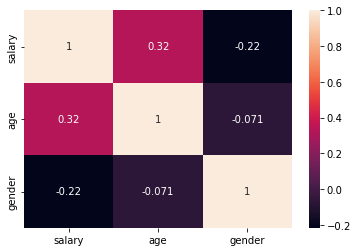

In [7]:
def employee_correlation_hm(df):
    df = df[["salary", "age", "gender"]].corr()
    sb.heatmap(df, annot=True)
    return df

employee_correlation_hm(df_w_age_group)